# Getting Started with Transfer Learning

With Machine Learning, it is advantageous to build your own tuned model off the shoulders of a pre-trained model. This can save a lot of time and money, not to mention you may not even have enough data to build a great model from scratch. It's a bit appealing in my mind, because if you could plug in a state-of-the-art right infront of your starter-kit model for a huge performance boost, it almost seems silly not to. Perhaps I will learn of the trade-offs as I explore this subject further.

## Scenario 1: Fine Tuning the ConvNet

## Scenario 2: Feature extractor from ConvNet

In this scenario, you take the architecture of developed Convolutional Neural Network, and essentially chop of the last layers. You do this because those last layers do a lot of the final classification work, while what you want is the capabilities of the earlier layers of the pre-trained model. The earlier layers have more low-level representation of your input. For example with images, the earlier layers get excited over features such as edges, shapes and colors. You want to make use of these representations, then swap out the classification with your own 

In [2]:
# Pull in the PyTorch, Numpy, Data and Plotting Libraries

from __future__ import print_function, division

import sys
import imp

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.ion() # interactive mode

## The Data

In this lesson I'm going to be using transfer learning to classify ants and bees. This dataset only contains 120 taining images, but supposedly that's all you need to generalize on with the help of a pre-trained model

In [8]:
data_transforms = {
    'train': transforms.Compose([
            transforms.RandomSizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    'val': transforms.Compose([
            transforms.Scale(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
}

data_dir = 'hymenoptera_data'
dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
         for x in ['train', 'val']}
dset_loaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=4, shuffle=True, num_workers=4)
                for x in ['train', 'val']}

dset_sizes = {x: len(dsets[x]) for x in ['train', 'val']}
dset_classes = dsets['train'].classes

use_gpu = torch.cuda.is_available()

## Data Visualization

Just showing a few training images to better understand the data augmentations

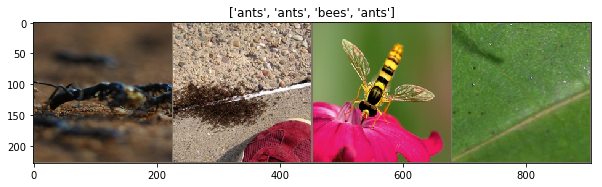

In [10]:
def imshow(inp, title=None):
    
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([.485, .456, .406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

# Get batch of training data
inputs, classes = next(iter(dset_loaders['train']))

# Make grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[dset_classes[x] for x in classes])

## Training the model

In [ ]:
def trainer(model, criterion, optimizer, lr_scheduler, num_epochs=25):
    since = time.time()  # time training
    
    best_model = model
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        